# Scraping Data from Transfermarkt and Visualize

### 1. Read Libraries

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

### 2. Building function to scrap data

In [2]:
def Team(sequence):
    #Things we need (Name, Value, Age, Position, Number, Team)
    Player_List = []
    Value_List = []
    Age_List = []
    Position_List = []
    Number_List = []
    Team_List = []
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    for i in range(len(sequence)):
        e = sequence[i]
        # Scraping
        pageTree = requests.get(e, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Players = pageSoup.find_all("td", {"class": "hide"})
        Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Age = pageSoup.find_all("td", {"class": "zentriert"})
        Position = pageSoup.find_all("tr")
        Number = pageSoup.find_all("td")
        a = 0
        b = 0 
        c = 1
        d = 4
        e = 3
        while a < len(Players):
            Player_List.append(Players[a].text)
            a = a + 1
            Team_List.append(sequence[i][32:(len(sequence[i])-22)])
        while b < len(Values):
            Value_List.append(Values[b].text)
            b = b + 1
        while c < (1+len(Players)*3):
            Age_List.append(Age[c].text)
            c = c + 3
        while d < (4+len(Players)*3):
            Position_List.append(Position[d].text)
            d = d + 3 
        while e < (3+len(Players)*9):
            Number_List.append(Number[e].text)
            e = e + 9
    # Return these results to dataframe
    Player = pd.DataFrame({'Player':Player_List})
    Value = pd.DataFrame({'Value':Value_List})
    Age = pd.DataFrame({'Age':Age_List})    
    Position = pd.DataFrame({'Position':Position_List})  
    Number = pd.DataFrame({'Number':Number_List})  
    Club = pd.DataFrame({'Club':Team_List})
    return Player, Value, Age, Position, Number, Club

In [3]:
# Scrapping 20 Clubs data
Player,Value,Age, Position, Number, Club = Team(['https://www.transfermarkt.co.uk/manchester-city/startseite/verein/281',
      'https://www.transfermarkt.co.uk/fc-liverpool/startseite/verein/31',
      'https://www.transfermarkt.co.uk/fc-chelsea/startseite/verein/631',
      'https://www.transfermarkt.co.uk/tottenham-hotspur/startseite/verein/148',
      'https://www.transfermarkt.co.uk/fc-arsenal/startseite/verein/11',
      'https://www.transfermarkt.co.uk/manchester-united/startseite/verein/985',
      'https://www.transfermarkt.co.uk/wolverhampton-wanderers/startseite/verein/543',
      'https://www.transfermarkt.co.uk/fc-everton/startseite/verein/29',
      'https://www.transfermarkt.co.uk/leicester-city/startseite/verein/1003',
      'https://www.transfermarkt.co.uk/west-ham-united/startseite/verein/379',
      'https://www.transfermarkt.co.uk/fc-watford/startseite/verein/1010',
      'https://www.transfermarkt.co.uk/crystal-palace/startseite/verein/873',
      'https://www.transfermarkt.co.uk/newcastle-united/startseite/verein/762',
      'https://www.transfermarkt.co.uk/afc-bournemouth/startseite/verein/989',
      'https://www.transfermarkt.co.uk/fc-burnley/startseite/verein/1132',
      'https://www.transfermarkt.co.uk/fc-southampton/startseite/verein/180',
      'https://www.transfermarkt.co.uk/brighton-amp-hove-albion/startseite/verein/1237',
      'https://www.transfermarkt.co.uk/norwich-city/startseite/verein/1123',
      'https://www.transfermarkt.co.uk/sheffield-united/startseite/verein/350',
      'https://www.transfermarkt.co.uk/aston-villa/startseite/verein/405'])

In [4]:
# Join Together
EPL =  Player.join(Value).join(Age).join(Position).join(Number).join(Club)


In [5]:
# Transform player value to float for further analysis
EPL[['Value']] = pd.concat([Value[col].str.split()
                       .str[0]
                       .str.replace('£','')
                       .str.replace('k','000')
                       .str.replace('m','').astype(float) for col in Value], axis=1)

In [6]:
Filter = EPL[EPL.Value>200].copy(deep=False)
Filter['Value'] = Filter['Value'].div(1000000).round(2)
EPL[EPL.Value>200] = Filter

In [7]:
# Transform player birth date and age to age (numeric)
Ranking = EPL.sort_values('Value',ascending = False).reset_index(drop = 'True')
Age = Ranking['Age'].str[-3:-1]
Ranking['Age'] = Age.astype(int)

#### Final version of data

In [8]:
Ranking

,Player,Value,Age,Position,Number,Club
0,Raheem Sterling,144.00,25,Left Winger,7,manchester-city
1,Harry Kane,135.00,26,Centre-Forward,10,tottenham-hotspur
2,Mohamed Salah,135.00,27,Right Winger,11,fc-liverpoo
3,Sadio Mané,135.00,27,Left Winger,10,fc-liverpoo
4,Kevin De Bruyne,135.00,28,Attacking Midfield,17,manchester-city
5,Trent Alexander-Arnold,99.00,21,Right-Back,66,fc-liverpoo
6,Virgil van Dijk,90.00,28,Centre-Back,4,fc-liverpoo
7,N'Golo Kanté,90.00,28,Central Midfield,7,fc-chelsea
8,Bernardo Silva,90.00,25,Right Winger,20,manchester-city
9,Leroy Sané,90.00,23,Left Winger,19,manchester-city


### 3. Data Visualization

#### The descriptive Statistics of Age

In [9]:
Ranking['Age'].describe()

count    524.000000
mean      26.557252
std        4.201721
min       18.000000
25%       23.000000
50%       27.000000
75%       30.000000
max       39.000000
Name: Age, dtype: float64

#### Top 10 Players with highest values

In [10]:
Ranking.sort_values("Value",ascending = False).reset_index(drop = 'True').iloc[:10,]

,Player,Value,Age,Position,Number,Club
0,Raheem Sterling,144.0,25,Left Winger,7,manchester-city
1,Mohamed Salah,135.0,27,Right Winger,11,fc-liverpoo
2,Sadio Mané,135.0,27,Left Winger,10,fc-liverpoo
3,Kevin De Bruyne,135.0,28,Attacking Midfield,17,manchester-city
4,Harry Kane,135.0,26,Centre-Forward,10,tottenham-hotspur
5,Trent Alexander-Arnold,99.0,21,Right-Back,66,fc-liverpoo
6,Virgil van Dijk,90.0,28,Centre-Back,4,fc-liverpoo
7,N'Golo Kanté,90.0,28,Central Midfield,7,fc-chelsea
8,Bernardo Silva,90.0,25,Right Winger,20,manchester-city
9,Leroy Sané,90.0,23,Left Winger,19,manchester-city


#### Players Age Distribution

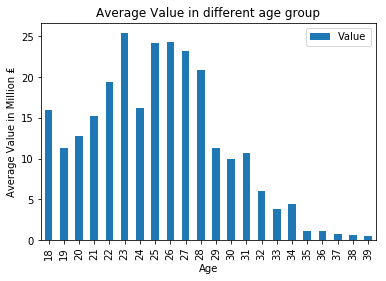

In [11]:
Ranking.groupby('Age')[['Value']].mean().plot.bar()
plt.xlabel('Age')
plt.ylabel('Average Value in Million ₤')
plt.title('Average Value in different age group')
plt.show()

#### Clubs Value Ranking 

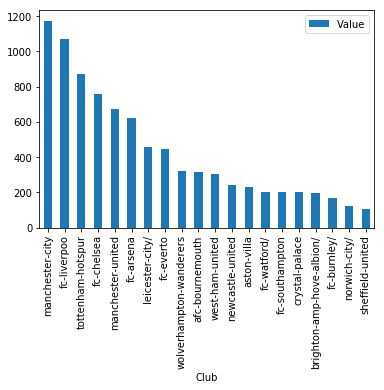

In [12]:
Ranking.groupby('Club')[['Value']].sum().sort_values('Value',ascending = False).plot.bar()